In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("../features.csv")
df.head()

,content_hash,difficulty_id,instrument_id,genre_id,song_id,duration_sec,rms_energy_mean,rms_energy_std,amplitude_envelope_min,amplitude_envelope_max,...,inter_note_ms_std,inter_note_ms_median,inter_note_ms_p25,inter_note_ms_p75,sustain_ratio,chord_ratio,fret_entropy,hopo_ratio,star_power_ratio,tap_ratio
0,00068c50bf7a2a95,0,2,7,3631,163.480091,1.891090,1.430148,0.402069,4.052784,...,742.686223,830.0,820.0,830.0,0.041667,0.000000,1.107923,0.000000,0.104167,0.000000
1,00044d42d97be12d,0,2,4,1694,194.292971,1.687803,0.795066,0.098820,2.682918,...,564.478392,1060.0,1050.0,1085.0,0.378378,0.000000,0.986289,0.000000,0.189189,0.000000
2,0005aa02866dddf6,0,2,1,2663,313.620317,1.692548,0.409827,0.087721,2.114662,...,473.929208,730.0,720.0,740.0,0.075269,0.000000,1.488865,0.997312,0.169355,0.000000
3,0003cad26b028e39,1,0,1,1470,285.826032,1.766457,0.513506,0.056087,2.944388,...,415.654713,360.0,240.0,490.0,0.356021,0.031414,1.367438,0.942408,0.116928,0.057592
4,0005cc1d3cbc5253,2,1,3,340,247.118367,3.104284,1.243821,0.271522,6.126035,...,580.585199,250.0,250.0,510.0,0.111905,0.690476,1.583723,0.990476,0.119048,0.002381


In [3]:
df.info()
df.describe(include="all").T

<class 'pandas.DataFrame'>
RangeIndex: 53383 entries, 0 to 53382
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   content_hash              53383 non-null  str    
 1   difficulty_id             53383 non-null  int64  
 2   instrument_id             53383 non-null  int64  
 3   genre_id                  53383 non-null  int64  
 4   song_id                   53383 non-null  int64  
 5   duration_sec              53383 non-null  float64
 6   rms_energy_mean           53383 non-null  float64
 7   rms_energy_std            53383 non-null  float64
 8   amplitude_envelope_min    53383 non-null  float64
 9   amplitude_envelope_max    53383 non-null  float64
 10  amplitude_envelope_range  53383 non-null  float64
 11  tempo_bpm                 53383 non-null  float64
 12  mel_rms_mean              53383 non-null  float64
 13  mel_rms_std               53383 non-null  float64
 14  spectral_centroid

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
content_hash,53383,53383,00068c50bf7a2a95,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
difficulty_id,53383.0,NaN,NaN,NaN,1.52365,1.124869,0.0,1.0,2.0,3.0,3.0
instrument_id,53383.0,NaN,NaN,NaN,1.16155,1.096816,0.0,0.0,2.0,2.0,3.0
genre_id,53383.0,NaN,NaN,NaN,3.06622,3.423558,0.0,1.0,2.0,3.0,15.0
song_id,53383.0,NaN,NaN,NaN,3693.214825,1887.892057,1.0,2182.5,3655.0,5368.0,6947.0
duration_sec,53383.0,NaN,NaN,NaN,243.689344,79.733132,11.215238,198.344853,231.851247,272.637098,1224.260499
rms_energy_mean,53383.0,NaN,NaN,NaN,1.922308,8.140716,1.318888,1.630267,1.713946,1.842965,709.874695
rms_energy_std,53383.0,NaN,NaN,NaN,1.372491,43.02931,0.242197,0.470528,0.585452,0.763134,3884.724854
amplitude_envelope_min,53383.0,NaN,NaN,NaN,0.117366,0.107658,0.000678,0.048177,0.086024,0.152162,1.188067
amplitude_envelope_max,53383.0,NaN,NaN,NaN,12.77088,790.131946,1.658147,2.432058,2.791357,3.43107,88543.609375


In [4]:
summary = {
    "rows": len(df),
    "unique_charts": df["content_hash"].nunique(),
    "difficulties": sorted(df["difficulty_id"].unique().tolist()),
    "instruments": sorted(df["instrument_id"].unique().tolist()),
}
summary

{'rows': 53383,
 'unique_charts': 53383,
 'difficulties': [0, 1, 2, 3],
 'instruments': [0, 1, 2, 3]}

In [5]:
pd.crosstab(df["difficulty_id"], df["instrument_id"])

instrument_id,0,1,2,3
difficulty_id,,,,
0,5841,373,5786,1138
1,5837,374,5780,1139
2,5841,372,5784,1141
3,6398,383,6037,1159


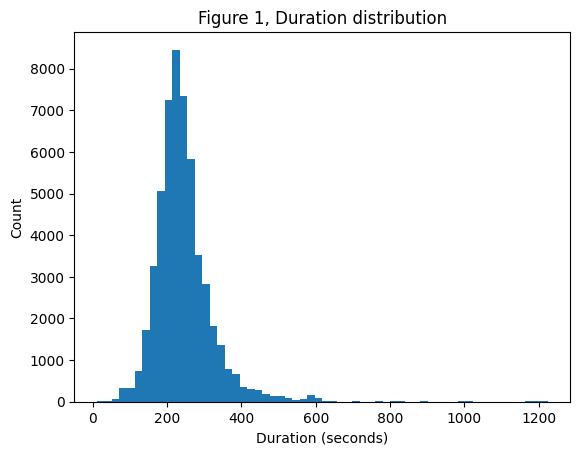

In [6]:
plt.hist(df["duration_sec"].dropna(), bins=60)
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.title("Figure 1, Duration distribution")
plt.show()

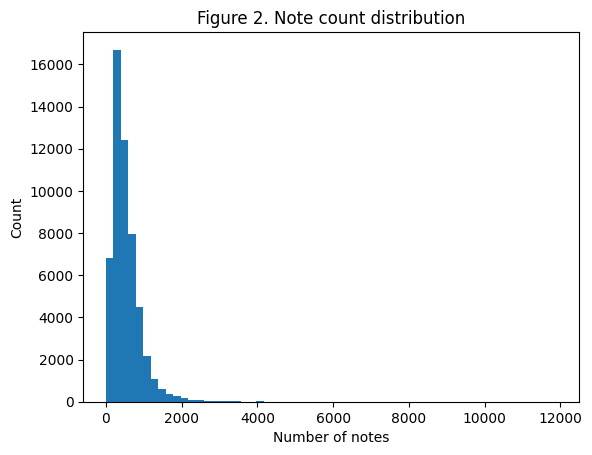

In [7]:
plt.hist(df["n_notes"].dropna(), bins=60)
plt.xlabel("Number of notes")
plt.ylabel("Count")
plt.title("Figure 2. Note count distribution")
plt.show()

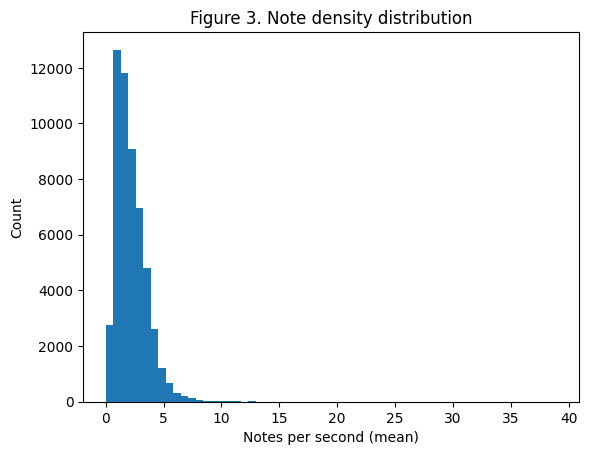

In [8]:
plt.hist(df["notes_per_second_mean"].dropna(), bins=60)
plt.xlabel("Notes per second (mean)")
plt.ylabel("Count")
plt.title("Figure 3. Note density distribution")
plt.show()

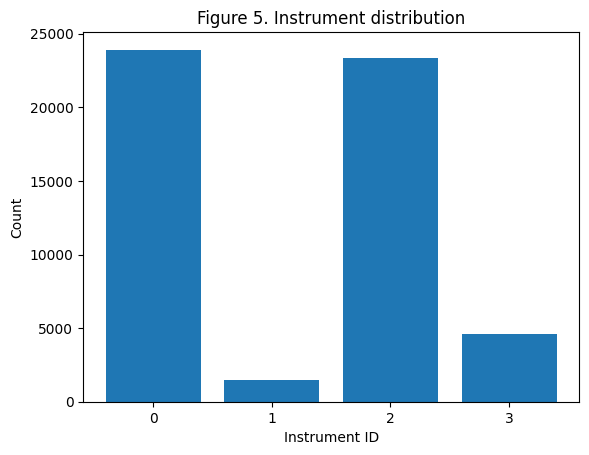

In [9]:
counts = df["instrument_id"].value_counts().sort_index()
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel("Instrument ID")
plt.ylabel("Count")
plt.title("Figure 5. Instrument distribution")
plt.show()


C:\Users\Susan\AppData\Local\Temp\ipykernel_48176\422540557.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[str(d) for d in diffs], showfliers=False)


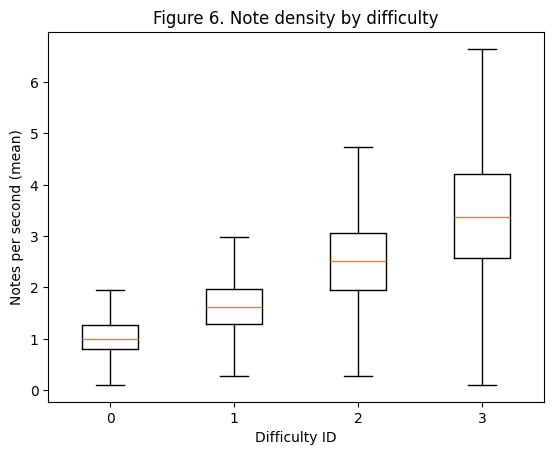

In [10]:
diffs = sorted(df["difficulty_id"].unique())
groups = [df.loc[df["difficulty_id"] == d, "notes_per_second_mean"].dropna() for d in diffs]

plt.boxplot(groups, labels=[str(d) for d in diffs], showfliers=False)
plt.xlabel("Difficulty ID")
plt.ylabel("Notes per second (mean)")
plt.title("Figure 6. Note density by difficulty")
plt.show()


C:\Users\Susan\AppData\Local\Temp\ipykernel_48176\1086473112.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[str(d) for d in diffs], showfliers=False)


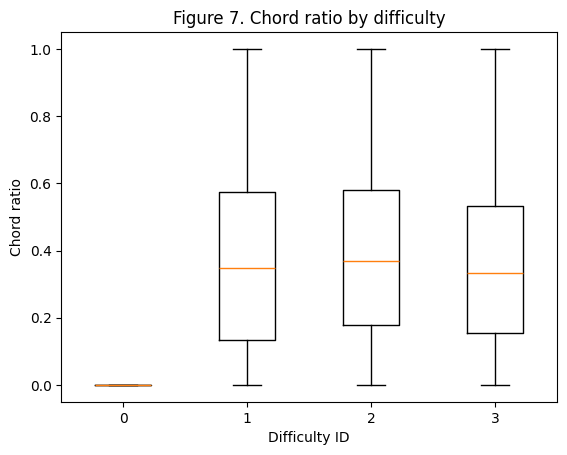

In [11]:
groups = [df.loc[df["difficulty_id"] == d, "chord_ratio"].dropna() for d in diffs]

plt.boxplot(groups, labels=[str(d) for d in diffs], showfliers=False)
plt.xlabel("Difficulty ID")
plt.ylabel("Chord ratio")
plt.title("Figure 7. Chord ratio by difficulty")
plt.show()


C:\Users\Susan\AppData\Local\Temp\ipykernel_48176\3388020388.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[str(d) for d in diffs], showfliers=False)


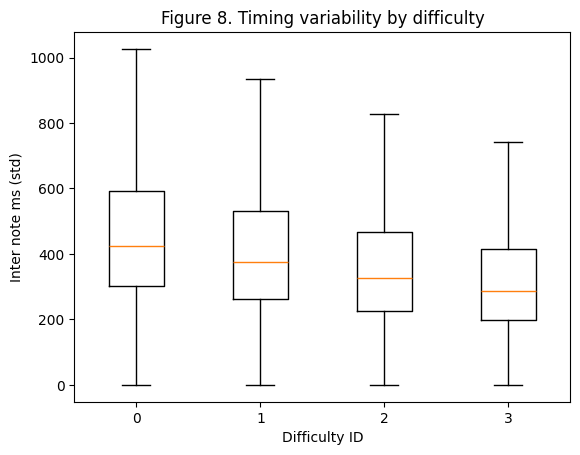

In [12]:
groups = [df.loc[df["difficulty_id"] == d, "inter_note_ms_std"].dropna() for d in diffs]

plt.boxplot(groups, labels=[str(d) for d in diffs], showfliers=False)
plt.xlabel("Difficulty ID")
plt.ylabel("Inter note ms (std)")
plt.title("Figure 8. Timing variability by difficulty")
plt.show()


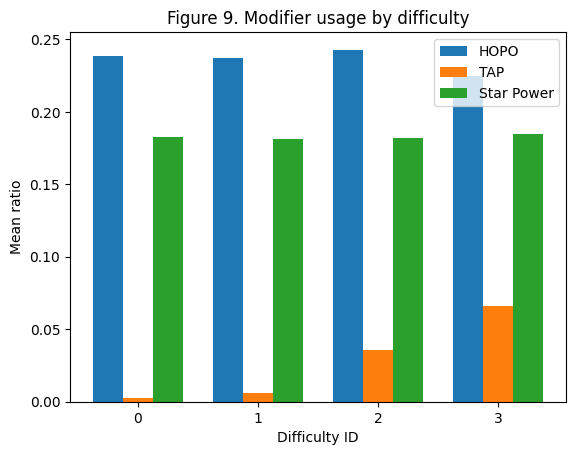

In [13]:


mod_means = df.groupby("difficulty_id")[["hopo_ratio","tap_ratio","star_power_ratio"]].mean().sort_index()

x = np.arange(len(mod_means.index))
w = 0.25

plt.bar(x - w, mod_means["hopo_ratio"].values, width=w, label="HOPO")
plt.bar(x,     mod_means["tap_ratio"].values,  width=w, label="TAP")
plt.bar(x + w, mod_means["star_power_ratio"].values, width=w, label="Star Power")

plt.xticks(x, [str(i) for i in mod_means.index])
plt.xlabel("Difficulty ID")
plt.ylabel("Mean ratio")
plt.title("Figure 9. Modifier usage by difficulty")
plt.legend()
plt.show()


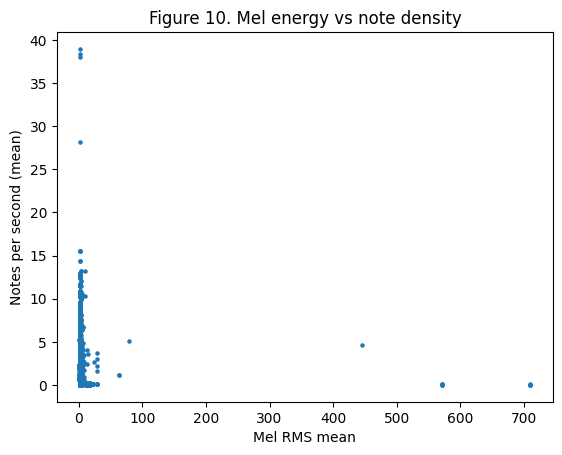

In [14]:
x = df["mel_rms_mean"]
y = df["notes_per_second_mean"]

mask = x.notna() & y.notna()
plt.scatter(x[mask], y[mask], s=5)
plt.xlabel("Mel RMS mean")
plt.ylabel("Notes per second (mean)")
plt.title("Figure 10. Mel energy vs note density")
plt.show()


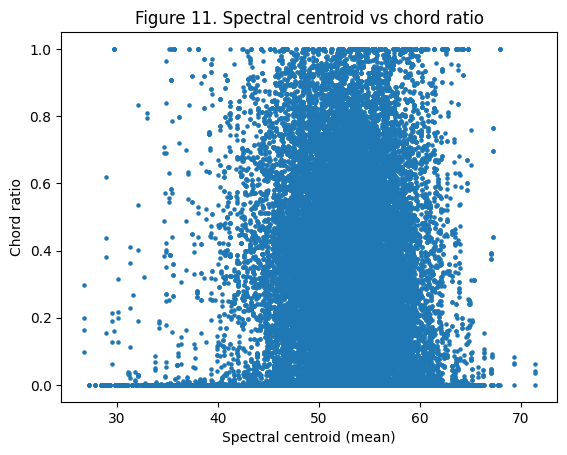

In [15]:
x = df["spectral_centroid_mean"]
y = df["chord_ratio"]

mask = x.notna() & y.notna()
plt.scatter(x[mask], y[mask], s=5)
plt.xlabel("Spectral centroid (mean)")
plt.ylabel("Chord ratio")
plt.title("Figure 11. Spectral centroid vs chord ratio")
plt.show()


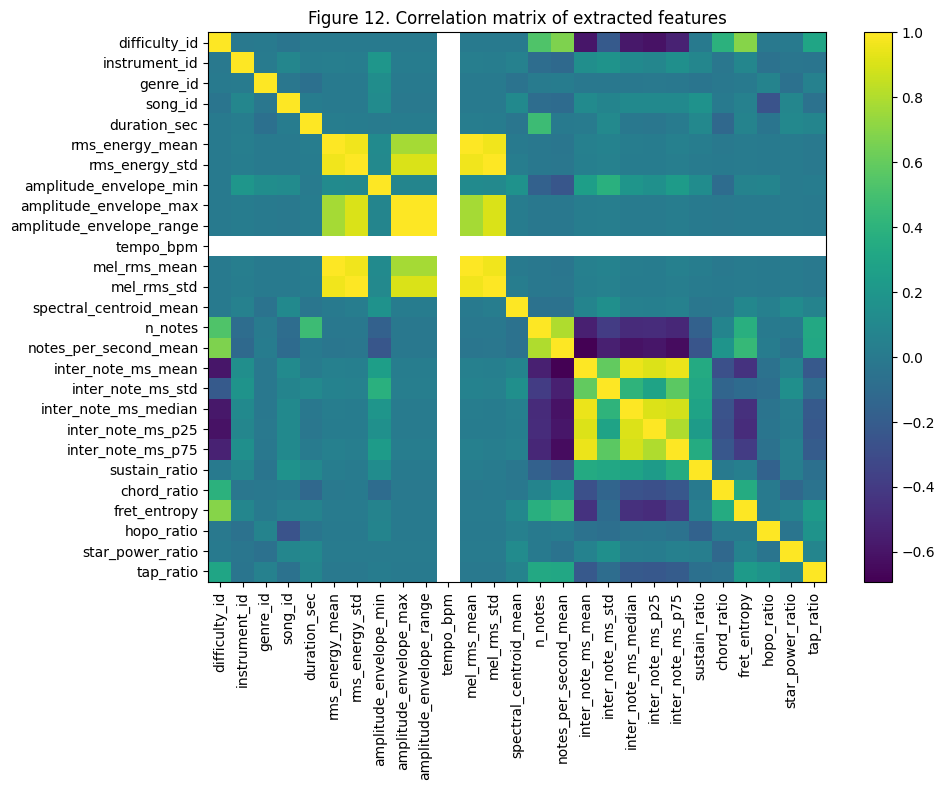

In [16]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols].corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr.values, aspect="auto")
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.colorbar()
plt.title("Figure 12. Correlation matrix of extracted features")
plt.tight_layout()
plt.show()


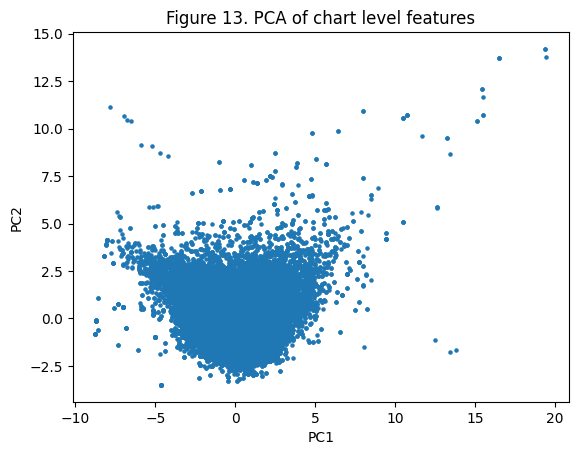

In [17]:
feature_cols = [
    "duration_sec","tempo_bpm","n_notes","notes_per_second_mean",
    "inter_note_ms_mean","inter_note_ms_std","sustain_ratio","chord_ratio",
    "fret_entropy","hopo_ratio","tap_ratio","star_power_ratio",
    "mel_rms_mean","spectral_centroid_mean"
]

X = df[feature_cols].replace([np.inf, -np.inf], np.nan).dropna()
Xz = StandardScaler().fit_transform(X.values)
Z = PCA(n_components=2, random_state=0).fit_transform(Xz)

plt.scatter(Z[:, 0], Z[:, 1], s=5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Figure 13. PCA of chart level features")
plt.show()

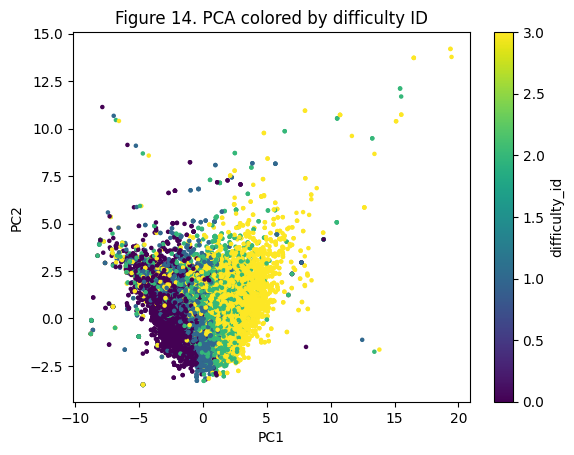

In [18]:
d = df.loc[X.index, "difficulty_id"].values
plt.scatter(Z[:, 0], Z[:, 1], c=d, s=5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Figure 14. PCA colored by difficulty ID")
plt.colorbar(label="difficulty_id")
plt.show()